In [ ]:
from os import read
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_id="18awLzJEh0MO1SRGYsv8I5I3W1zll1F5L"
url = f"https://drive.google.com/uc?id={file_id}"
data=pd.read_csv(url)
data.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [ ]:
data.tail()

,survived,pclass,name,sex,age,fare,sibsp,parch
709,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.125,0,5
710,0,2,"Montvila, Rev. Juozas",male,27.0,13.000,0,0
711,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.000,0,0
712,1,1,"Behr, Mr. Karl Howell",male,26.0,30.000,0,0
713,0,3,"Dooley, Mr. Patrick",male,32.0,7.750,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB


The categorical variable can be

sex(Male,Female),

pclass(1st,2nd,3rd),

name(Mr,Mrs)

Lets consider the categorical variable as sex

In [ ]:
data['cat_code']=data.sex.astype('category').cat.codes

In [ ]:
data.head()


,survived,pclass,name,sex,age,fare,sibsp,parch,cat_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0,1


In [ ]:
data.tail()

,survived,pclass,name,sex,age,fare,sibsp,parch,cat_code
709,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.125,0,5,0
710,0,2,"Montvila, Rev. Juozas",male,27.0,13.000,0,0,1
711,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.000,0,0,0
712,1,1,"Behr, Mr. Karl Howell",male,26.0,30.000,0,0,1
713,0,3,"Dooley, Mr. Patrick",male,32.0,7.750,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
 8   cat_code  714 non-null    int8   
dtypes: float64(2), int64(4), int8(1), object(2)
memory usage: 45.5+ KB


In [ ]:
data.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'fare', 'sibsp', 'parch',
       'cat_code'],
      dtype='object')

In [ ]:
data['cat_code'].unique()

array([1, 0], dtype=int8)

If the sex is Male it is 1

If the sex is Female it is 0

<Axes: ylabel='survived'>

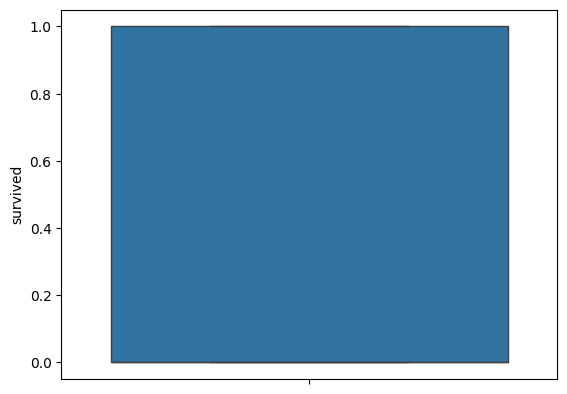

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['survived'])

<Axes: ylabel='pclass'>

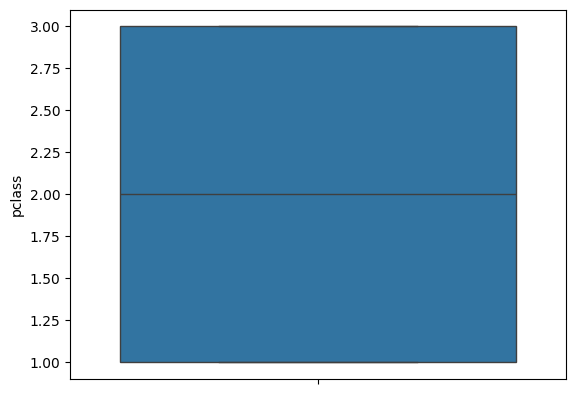

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['pclass'])

<Axes: ylabel='sex'>

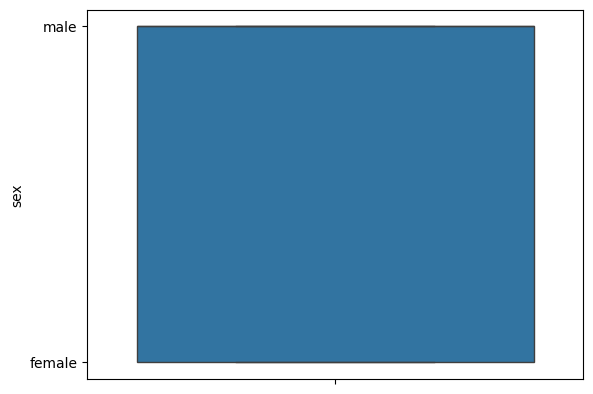

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['sex'])

<Axes: ylabel='age'>

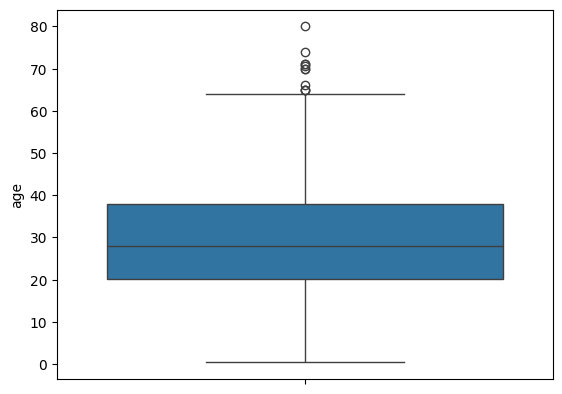

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['age'])

<Axes: ylabel='fare'>

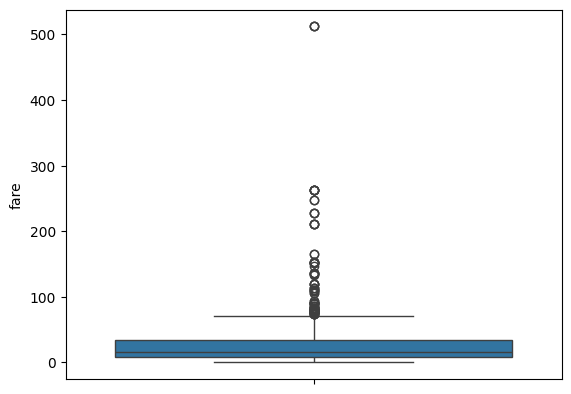

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['fare'])

<Axes: ylabel='sibsp'>

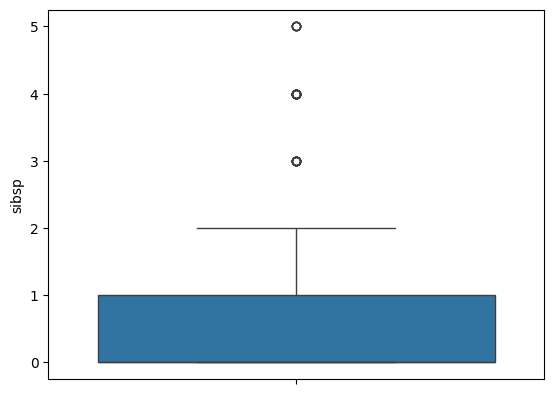

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['sibsp'])

<Axes: ylabel='parch'>

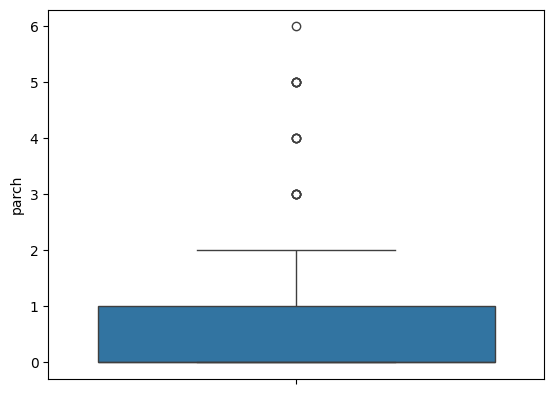

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['parch'])

In [ ]:
def Outlier_Treatment(data1, variable):
    percentile25 = data1[variable].quantile(0.25)
    percentile75 = data1[variable].quantile(0.75)
    iqr=percentile75 - percentile25
    print(percentile25)
    print(percentile75)
    print(iqr)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data1[data1[variable] > upper_limit]
    data1[data1[variable] < lower_limit]
    data1 = data1[(data1[variable] >= lower_limit) & (data1[variable] <= upper_limit)]
    plt.figure(figsize=(12,6))
    sns.boxplot(data1[variable])
    plt.show()
    global data
    data = data1

20.125
38.0
17.875


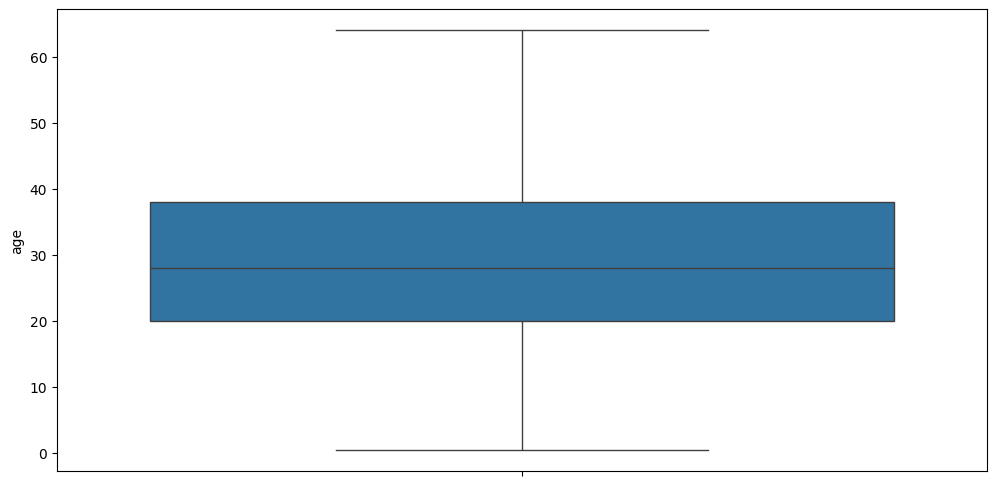

In [ ]:
Outlier_Treatment(data, 'age')

0.0
1.0
1.0


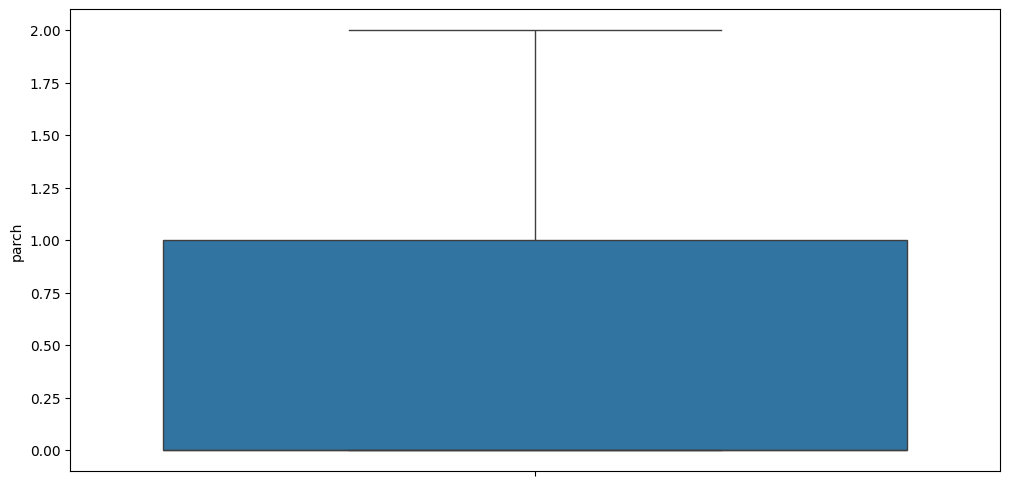

In [ ]:
Outlier_Treatment(data, 'parch')

0.0
1.0
1.0


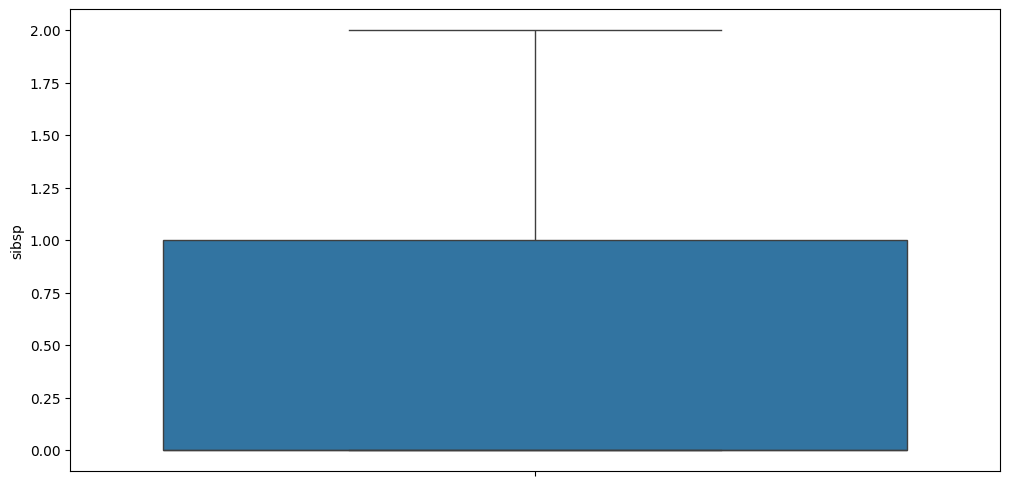

In [ ]:
Outlier_Treatment(data, 'sibsp')

8.05
30.6958
22.645799999999998


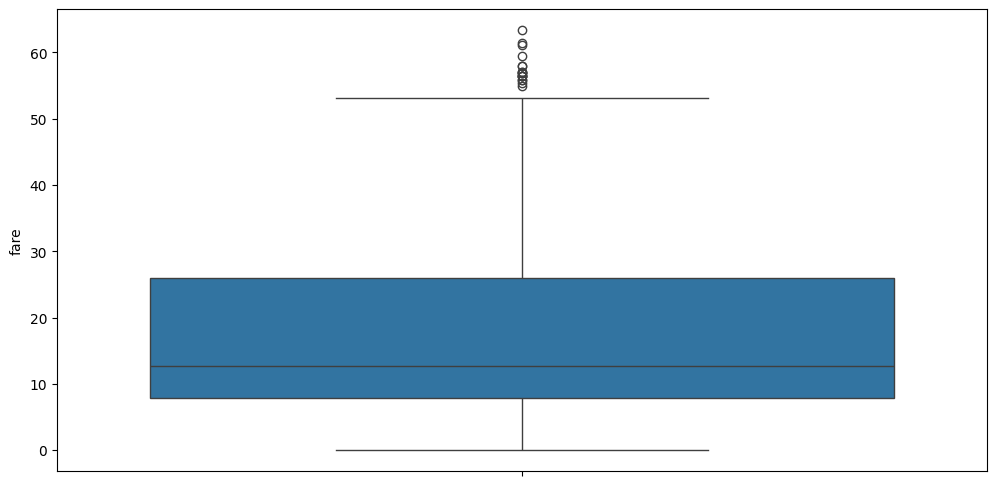

In [ ]:
Outlier_Treatment(data, 'fare')

In [ ]:
x=data[['survived', 'pclass', 'name', 'sex', 'age', 'fare', 'sibsp', 'parch']]
x

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
5,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,0,0
...,...,...,...,...,...,...,...,...
708,0,3,"Sutehall, Mr. Henry Jr",male,25.0,7.0500,0,0
710,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,0
711,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,0,0
712,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,0,0


In [ ]:
y=data['cat_code']
y

,cat_code
0,1
2,0
3,0
4,1
5,1
...,...
708,1
710,1
711,0
712,1


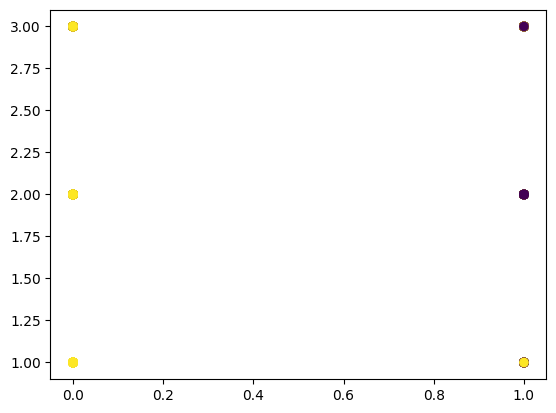

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x['survived'],x['pclass'],c=y)

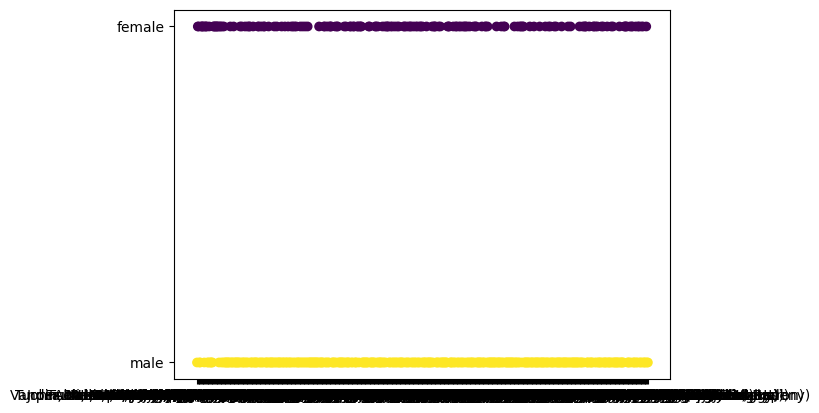

In [ ]:
plt.scatter(x['name'],x['sex'],c=y)

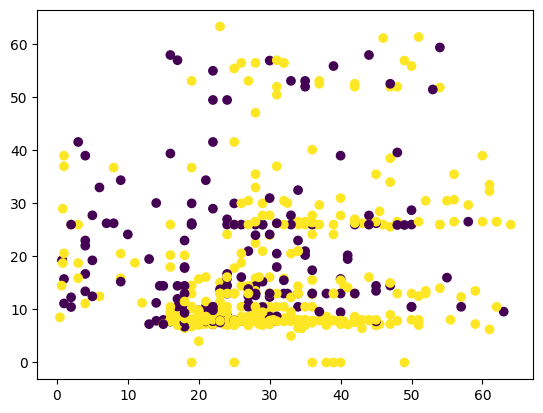

In [ ]:
plt.scatter(x['age'],x['fare'],c=y)

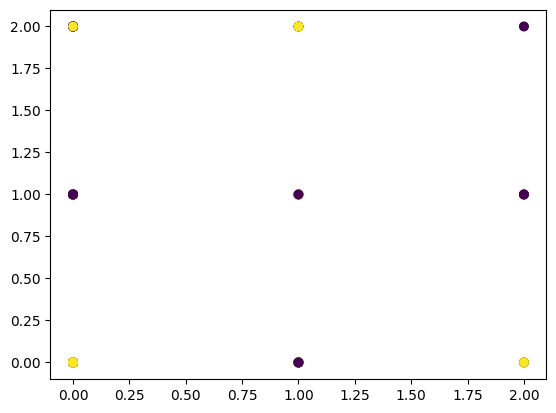

In [ ]:
plt.scatter(x['sibsp'],x['parch'],c=y)

In [ ]:
x.shape,y.shape

((555, 8), (555,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((444, 8), (111, 8), (444,), (111,))

In [ ]:

x = x.drop('name', axis=1)

x['sex'] = x['sex'].map({'male': 0, 'female': 1})


In [ ]:
x = x.fillna(x.mean(numeric_only=True))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

lm = LogisticRegression()
lm.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_pred = lm.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0], dtype=int8)

In [ ]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0], dtype=int8)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lm.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [ ]:
newval = pd.DataFrame({
    'survived': [1],
    'pclass': [2],
    'sex': [1],
    'age': [25],
    'fare': [30.0],
    'sibsp': [1],
    'parch': [0]
})

prediction = lm.predict(newval)
print("Survival Prediction:", prediction)


Survival Prediction: [0]


In [ ]:
newval = pd.DataFrame({
    'survived': [0],
    'pclass': [2],
    'sex': [0],
    'age': [28],
    'fare': [30.0],
    'sibsp': [1],
    'parch': [0]
})

prediction = lm.predict(newval)
print("Survival Prediction:", prediction)

Survival Prediction: [1]


<Axes: xlabel='survived', ylabel='pclass'>

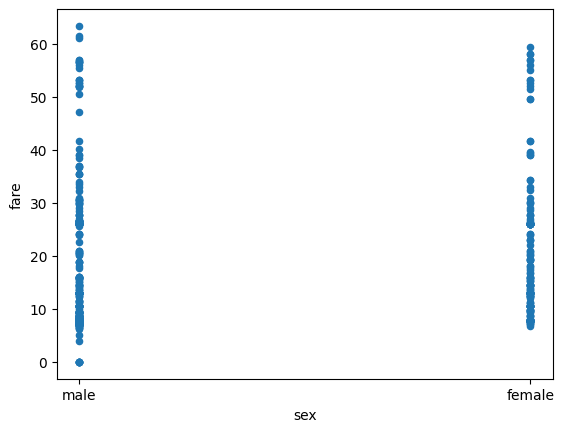

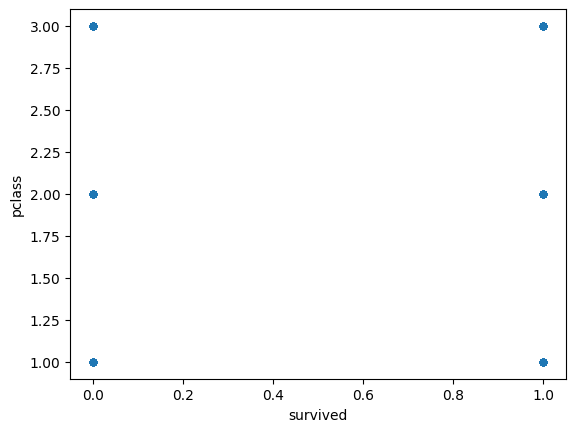

In [ ]:
data.plot(kind='scatter',x="sex", y="fare")
data.plot(kind='scatter',x="survived", y="pclass")

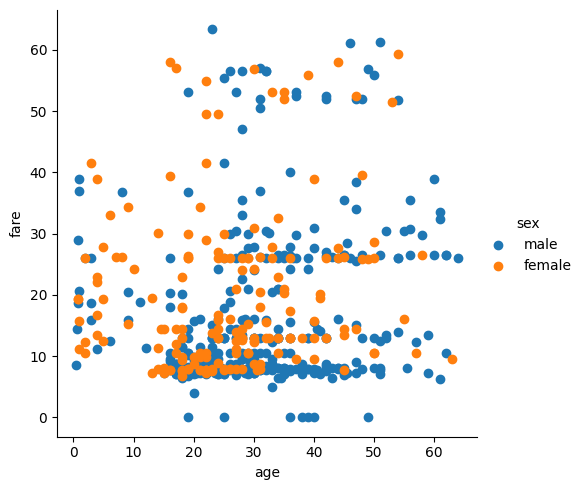

In [ ]:
sns.FacetGrid(data, height=5, hue="sex")\
   .map(plt.scatter, "age", "fare")\
   .add_legend()

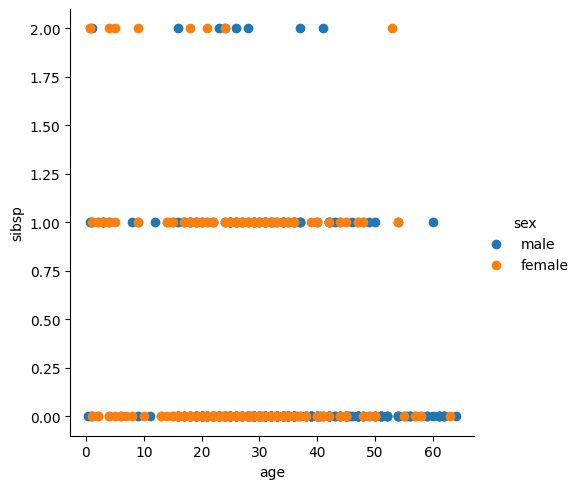

In [ ]:
sns.FacetGrid(data, height=5, hue="sex")\
   .map(plt.scatter, "age", "sibsp")\
   .add_legend()

<Axes: xlabel='sex', ylabel='age'>

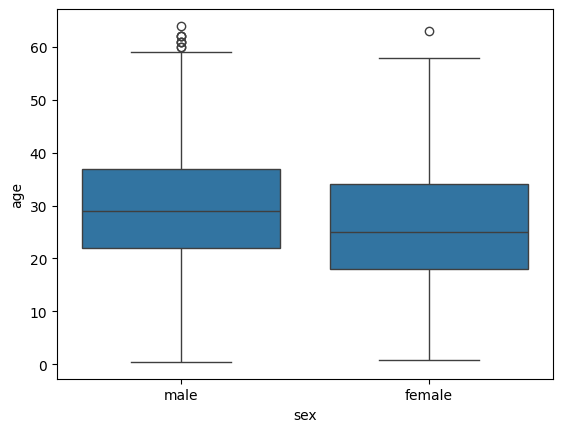

In [ ]:
sns.boxplot(x="sex", y="age", data=data)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
train, test = train_test_split(data, test_size = 0.25,random_state=100)
print(train.shape)
print(test.shape)

(416, 9)
(139, 9)


In [ ]:
train_X = train[['pclass', 'age', 'fare', 'sibsp', 'parch']]
train_y = train['survived']

test_X = test[['pclass', 'age', 'fare', 'sibsp', 'parch']]
test_y = test['survived']

In [ ]:
train_X.head()

,pclass,age,fare,sibsp,parch
29,3,18.0,18.0000,2,0
699,2,28.0,24.0000,1,0
418,2,50.0,10.5000,0,0
227,3,16.0,9.5000,0,0
250,3,28.0,7.8958,0,0


In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction=KNN.predict(test_X)

In [ ]:
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100,
      'percent')

The accuracy of the KNN is 71.94244604316546 percent


In [ ]:
test_y

,survived
249,0
631,0
551,0
643,0
140,0
...,...
181,0
338,0
645,0
32,0


In [ ]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0])

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
prediction=KNN.predict(test_X)
confusion_matrix(test_y,prediction)

array([[68, 20],
       [19, 32]])

In [ ]:
newval = pd.DataFrame({
    #'survived': [1],
    'pclass': [3],
    'age': [22],
    'fare': [7.25],
    'sibsp': [1],
    'parch': [0]
})

# Predict survival
KNN.predict(newval)

array([0])